# Custom CNN

In [ ]:
# !unrar x '/content/dataset.rar' '/content/'
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow
!pip install keras
!pip install split-folders
!pip install opencv-python

In [ ]:
!apt-get install unrar
!pip install rarfile

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import rarfile
import os

def extract_rar(rar_path, extract_to='/content'):
    """
    Extracts a .rar file to the specified directory on Google Colab.

    Parameters:
    rar_path (str): The path to the .rar file.
    extract_to (str): The directory to extract files into (default is /content).
    """
    # Check if the rar file exists
    if not os.path.exists(rar_path):
        print(f"The file {rar_path} does not exist.")
        return

    # Open the rar file and extract all contents
    with rarfile.RarFile(rar_path) as rf:
        rf.extractall(extract_to)
        print(f"Extracted all files to {extract_to}")

# Example usage
rar_file_path = '/content/gdrive/MyDrive/cluster dataset.rar'  # Replace with your .rar file path
output_directory = '/content/cluster_dataset'  # Replace with your desired extraction folder in Colab
extract_rar(rar_file_path, output_directory)


Extracted all files to /content/cluster_dataset


In [ ]:
import numpy as np
import cv2 as cv
import os
#import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf


# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import shutil, sys

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout, MaxPooling2D, Activation
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.optimizers import SGD

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/cluster_dataset/train'
validation_dir = '/content/cluster_dataset/val'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(200, 200),
batch_size=36,
shuffle=True
)

Found 7525 images belonging to 4 classes.


In [ ]:
train_generator.class_indices.items()

dict_items([('Histogram', 0), ('bar chart', 1), ('line chart', 2), ('pie chart', 3)])

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255, )
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(200, 200),
batch_size=36,
shuffle=True,
class_mode='categorical'
)

Found 1055 images belonging to 4 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Histogram
1 : bar chart
2 : line chart
3 : pie chart


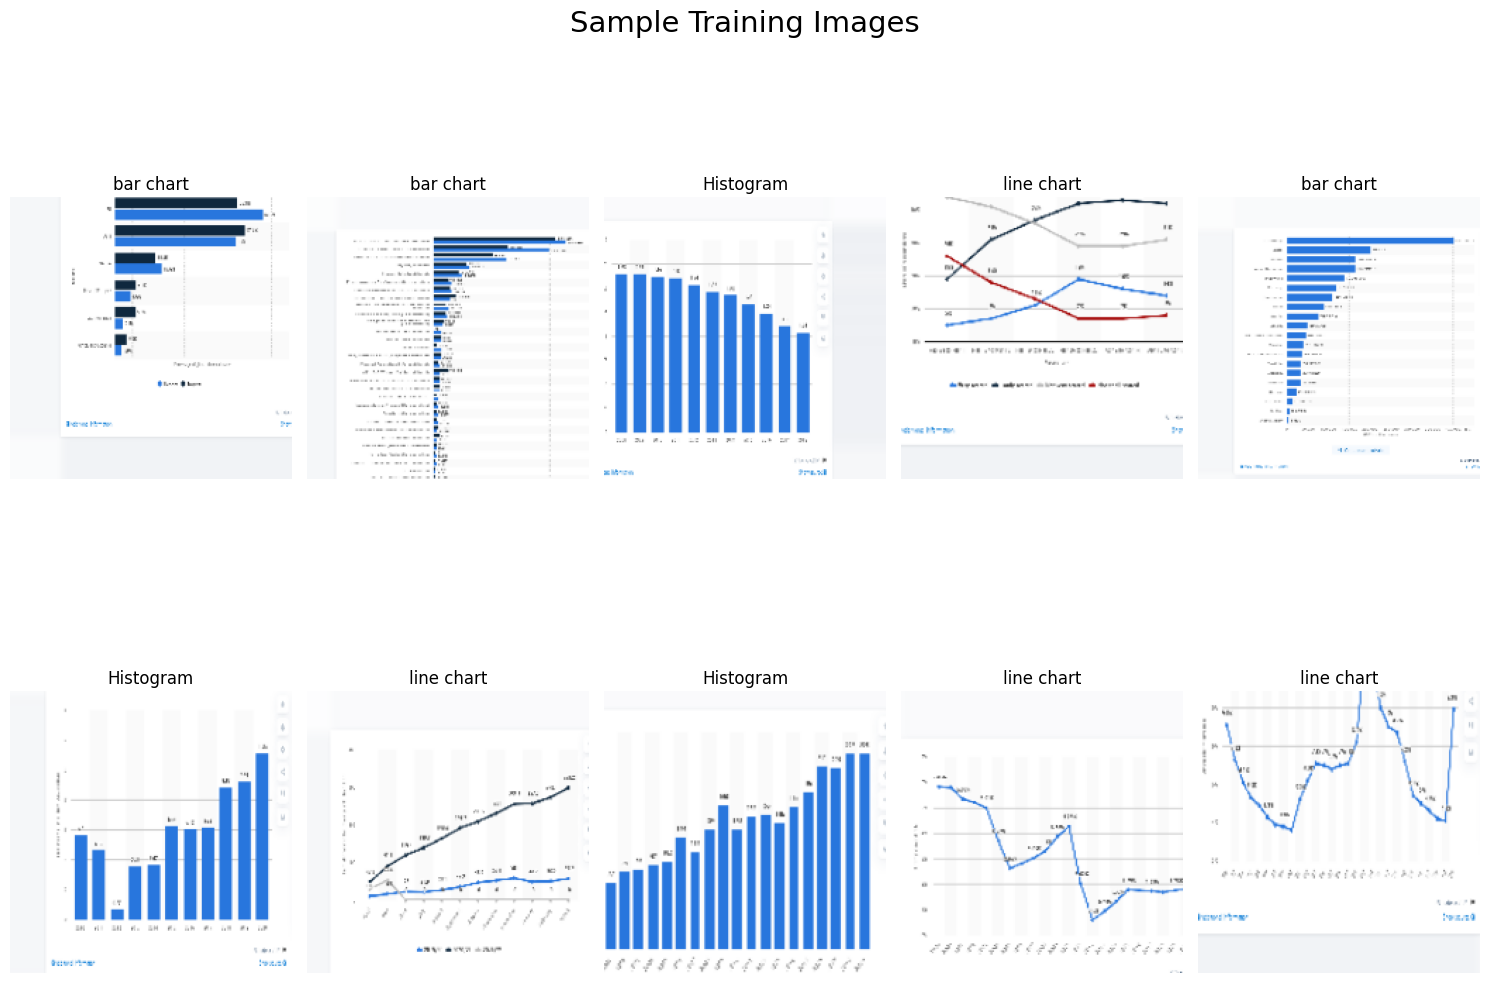

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
num_classes = len(labels)
input_shape = (200,200,3)

In [ ]:
num_classes

4

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2),
              activation='relu',
              kernel_initializer ='he_normal',
              input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(32,kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(32, kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(Activation('tanh'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 199, 199, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 99, 99, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 99, 99, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 99, 99, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 99, 99, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 99, 99, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 76832)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       2,458,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,496,228 (9.52 MB)

 Trainable params: 2,496,228 (9.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # Change the loss function to categorical_crossentropy
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 151s 699ms/step - accuracy: 0.3974 - loss: 2.3507 - val_accuracy: 0.1829 - val_loss: 2.3734
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 650ms/step - accuracy: 0.4086 - loss: 1.5737 - val_accuracy: 0.1829 - val_loss: 1.8071
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 649ms/step - accuracy: 0.4472 - loss: 1.3901 - val_accuracy: 0.7649 - val_loss: 1.1560
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 650ms/step - accuracy: 0.8207 - loss: 0.8506 - val_accuracy: 0.7081 - val_loss: 1.2912
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 650ms/step - accuracy: 0.8573 - loss: 0.7741 - val_accuracy: 0.7867 - val_loss: 0.9922
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 140s 647ms/step - accuracy: 0.9419 - loss: 0.5431 - val_accuracy: 0.8038 - val_loss: 1.0047
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 649ms/step - accuracy: 0.9514 - loss: 0.4916 - val_accuracy: 0.8123 - val_loss: 0.8676
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 650ms/step - accuracy: 0.9595 -

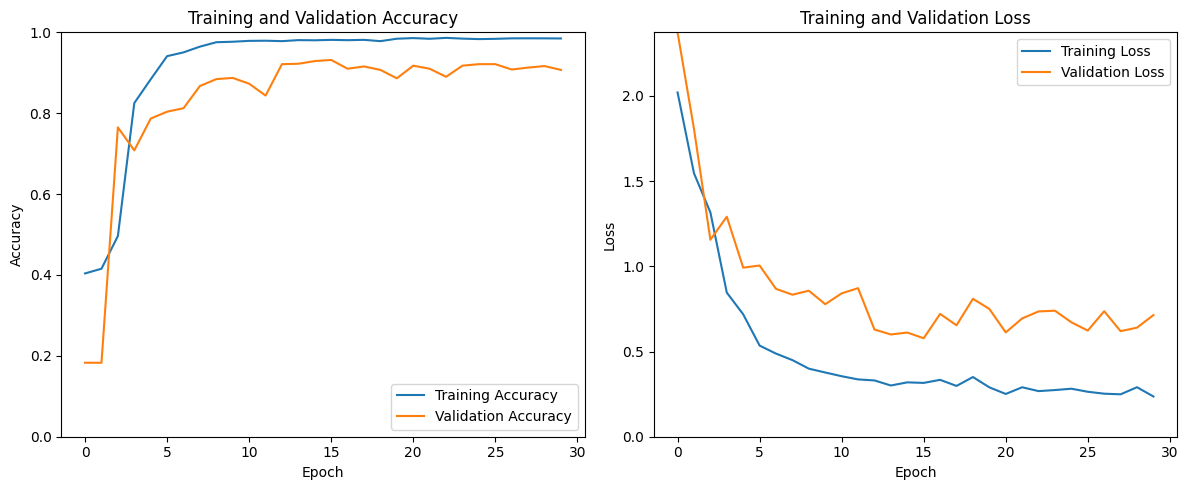

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
model.save('Custom_CNN.h5')

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Histogram
1 : bar chart
2 : line chart
3 : pie chart


In [ ]:
predictions = model.predict(validation_generator)

30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step


In [ ]:
# model.summary()
predictions[1]

array([0.01779699, 0.07096604, 0.8991712 , 0.01206575], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
word_dict = {0:'Histogram',1:'Bar Char', 2:'Line Chart', 3:'Pie Chart'}

In [ ]:
imgs, labels = next(validation_generator)

In [ ]:
np.argmax(labels[1])

0

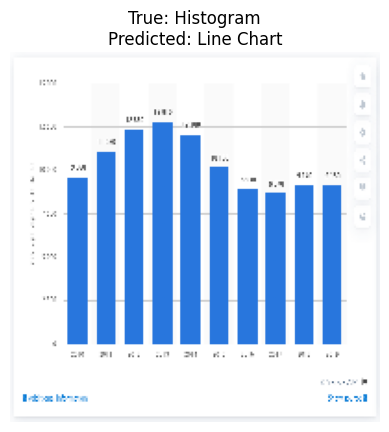

In [ ]:
true_label_index = np.argmax(labels[1])
predicted_label_index = np.argmax(predictions[1])
true_label_text = word_dict[true_label_index]
predicted_label_text = word_dict[predicted_label_index]
# Plot the image with labels
plt.imshow(imgs[1])
plt.title(f'True: {true_label_text}\nPredicted: {predicted_label_text}')
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dataset_dir = '/content/cluster_dataset/test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(200, 200),
    shuffle=False,
    batch_size=270,
    class_mode=None)

Found 1055 images belonging to 4 classes.


In [ ]:
# Now you can use your trained model to make predictions on the test data
predictions_test = model.predict(test_generator)
# Assuming 'word_dict' is a dictionary mapping class indices to their respective labels
# word_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6'}
# Decode the predictions and print the results
decoded_test_predictions = np.argmax(predictions_test, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step


In [ ]:
decoded_test_predictions = np.argmax(predictions_test, axis=1)
true_labels = test_generator.classes
test_accuracy = accuracy_score(true_labels, decoded_test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 90.71%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

Found 1055 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step
1055 1055


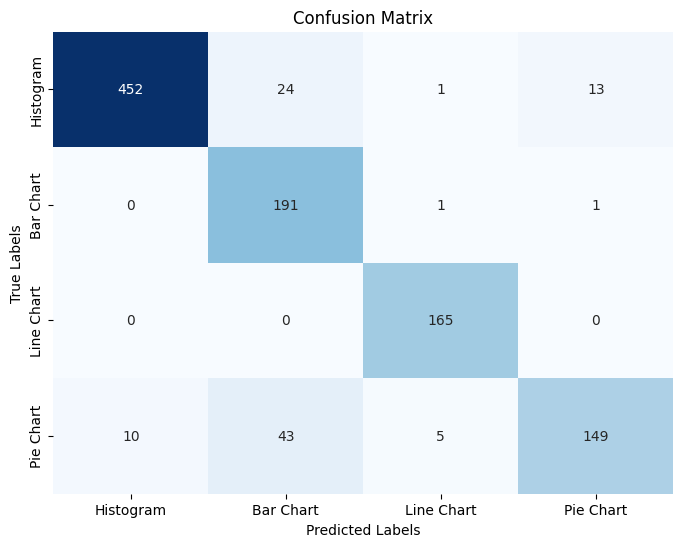

In [ ]:
# Assuming 'test_generator' is your test data generator
# Make sure 'shuffle' is set to False to maintain order
test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(200, 200),
    shuffle=False,  # Set shuffle to False for test data
    batch_size=36,  # Set batch_size based on your generator configuration
    class_mode='categorical'  # Use binary class_mode for binary classification
)

# Get true labels from the generator (already binary)
true_labels_binary = test_generator.classes

# Make predictions on the test data
predictions_test = model.predict(test_generator)

# Decode predictions
decoded_test_predictions = np.argmax(predictions_test, axis=1)

# Now, the lengths should match
print(len(true_labels_binary), len(decoded_test_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels_binary, decoded_test_predictions)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Histogram', 'Bar Chart', 'Line Chart', 'Pie Chart'], yticklabels=['Histogram', 'Bar Chart', 'Line Chart', 'Pie Chart'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Resnet50 Version 2

In [ ]:
import numpy as np
import cv2 as cv
import os
#import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf


# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import shutil, sys

In [ ]:
from tensorflow.keras import layers, Model
import tensorflow as tf

# Load the pre-trained ResNet50V2 model without the top layer
resnet50v2_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in resnet50v2_model.layers:
    layer.trainable = False

# Create your own model architecture
inputs = layers.Input(shape=(200, 200, 3))  # Set input shape to (200, 200, 3)
x = resnet50v2_model(inputs)  # Pass the input through the ResNet model
x = layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce the feature maps
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

In [ ]:
# Create the final model
# model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
# Create the final model
# model = Model(inputs=resnet50v2_model.input, outputs=predictions)
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)
# # Optionally, fine-tune some layers
# for layer in model.layers[-10:]:
#     layer.trainable = True

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 171s 720ms/step - accuracy: 0.9567 - loss: 0.1266 - val_accuracy: 0.7611 - val_loss: 1.3859
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 653ms/step - accuracy: 0.9920 - loss: 0.0298 - val_accuracy: 0.7962 - val_loss: 1.4910
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 652ms/step - accuracy: 0.9963 - loss: 0.0163 - val_accuracy: 0.8038 - val_loss: 1.0577
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 650ms/step - accuracy: 0.9918 - loss: 0.0309 - val_accuracy: 0.7953 - val_loss: 1.5699
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 650ms/step - accuracy: 0.9952 - loss: 0.0178 - val_accuracy: 0.7981 - val_loss: 1.2999
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 651ms/step - accuracy: 0.9957 - loss: 0.0122 - val_accuracy: 0.7991 - val_loss: 1.4446
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 650ms/step - accuracy: 0.9959 - loss: 0.0163 - val_accuracy: 0.8047 - val_loss: 1.6815
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 142s 656ms/step - accuracy: 0.9935 -

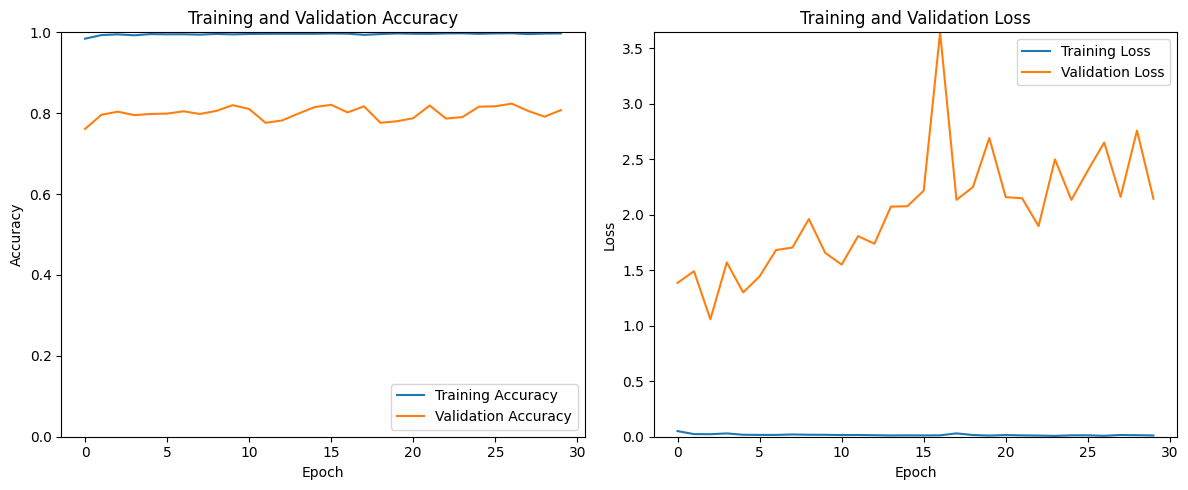

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
model.save('resnet50v2_model.h5')

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Histogram
1 : bar chart
2 : line chart
3 : pie chart


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
decoded_test_predictions = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes
test_accuracy = accuracy_score(true_labels, decoded_test_predictions)
print(f"Validation Accuracy: {test_accuracy * 100:.2f}%")

ValueError: A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

In [ ]:
np.argmax(predictions[100])

In [ ]:
word_dict = {0:'Histogram',1:'Bar Char', 2:'Line Chart', 3:'Pie Chart'}

In [ ]:
len(word_dict)

4

In [ ]:
imgs, labels = next(validation_generator)

In [ ]:
np.argmax(labels[1])

0

In [ ]:
len(imgs)

36

In [ ]:
# true_label_index = np.argmax(labels[1])
# predicted_label_index = np.argmax(predictions[1])
# true_label_text = word_dict[true_label_index]
# predicted_label_text = word_dict[predicted_label_index]
# # Plot the image with labels
# plt.imshow(imgs[1])
# plt.title(f'True: {true_label_text}\nPredicted: {predicted_label_text}')
# plt.axis('off')
# plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dataset_dir = '/content/cluster_dataset/test'

# Create an ImageDataGenerator for test data (you might not need data augmentation for testing)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test data generator
test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(200, 200),
    shuffle=False,
    batch_size=270,
    class_mode=None)  # Set class_mode to None as it's for prediction))

Found 1055 images belonging to 4 classes.


In [ ]:
# Now you can use your trained model to make predictions on the test data
predictions_test = model.predict(test_generator)
# Assuming 'word_dict' is a dictionary mapping class indices to their respective labels
# word_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6'}
# Decode the predictions and print the results
decoded_test_predictions = np.argmax(predictions_test, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step


In [ ]:
decoded_test_predictions = np.argmax(predictions_test, axis=1)
true_labels = test_generator.classes
test_accuracy = accuracy_score(true_labels, decoded_test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 80.76%


Found 1055 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 322ms/step
1055 1055


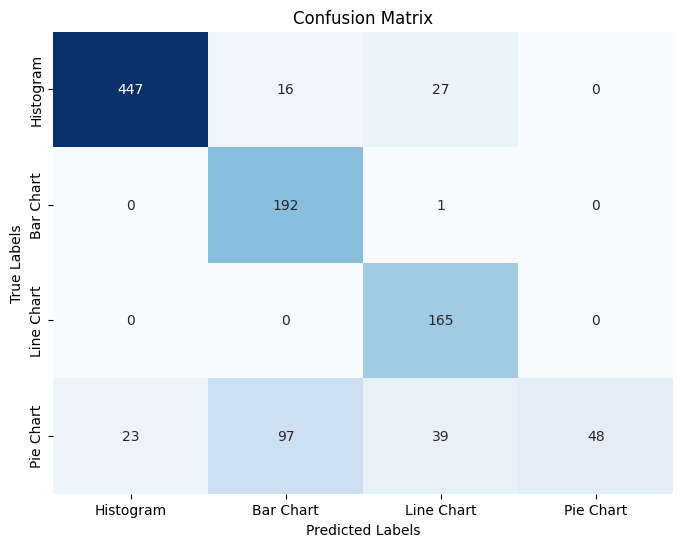

In [ ]:
# Assuming 'test_generator' is your test data generator
# Make sure 'shuffle' is set to False to maintain order
test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(200, 200),
    shuffle=False,  # Set shuffle to False for test data
    batch_size=36,  # Set batch_size based on your generator configuration
    class_mode='categorical'  # Use binary class_mode for binary classification
)

# Get true labels from the generator (already binary)
true_labels_binary = test_generator.classes

# Make predictions on the test data
predictions_test = model.predict(test_generator)

# Decode predictions
decoded_test_predictions = np.argmax(predictions_test, axis=1)

# Now, the lengths should match
print(len(true_labels_binary), len(decoded_test_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels_binary, decoded_test_predictions)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Histogram', 'Bar Chart', 'Line Chart', 'Pie Chart'], yticklabels=['Histogram', 'Bar Chart', 'Line Chart', 'Pie Chart'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Resnet

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10, cifar100
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
import numpy as np
import random
import matplotlib.pyplot as plt
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
#import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import pandas as pd
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
#import required libraries — we do need the models, flatten, dense, input layers
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
# from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
# Load pre-trained ResNet-50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the layers
for layer in resnet_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model = models.Sequential()
model.add(resnet_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

ValueError: Undefined shapes are not supported.

In [ ]:
print(len(train_generator), len(validation_generator))

210 30


In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    steps_per_epoch=None,
    validation_steps=None
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


210/210 ━━━━━━━━━━━━━━━━━━━━ 154s 647ms/step - accuracy: 0.6749 - loss: 5.2597 - val_accuracy: 0.7934 - val_loss: 0.7684
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 129s 595ms/step - accuracy: 0.8333 - loss: 0.4379 - val_accuracy: 0.7905 - val_loss: 0.9662
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 129s 599ms/step - accuracy: 0.7669 - loss: 0.6104 - val_accuracy: 0.7829 - val_loss: 0.9487
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 129s 599ms/step - accuracy: 0.8112 - loss: 0.4335 - val_accuracy: 0.7488 - val_loss: 1.1441
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 129s 595ms/step - accuracy: 0.8403 - loss: 0.3938 - val_accuracy: 0.8275 - val_loss: 0.8343
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 129s 595ms/step - accuracy: 0.8309 - loss: 0.4602 - val_accuracy: 0.8009 - val_loss: 1.0072
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 129s 597ms/step - accuracy: 0.8634 - loss: 0.4047 - val_accuracy: 0.7744 - val_loss: 1.0529
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 129s 597ms/step - accuracy: 0.8538 - loss: 0.39

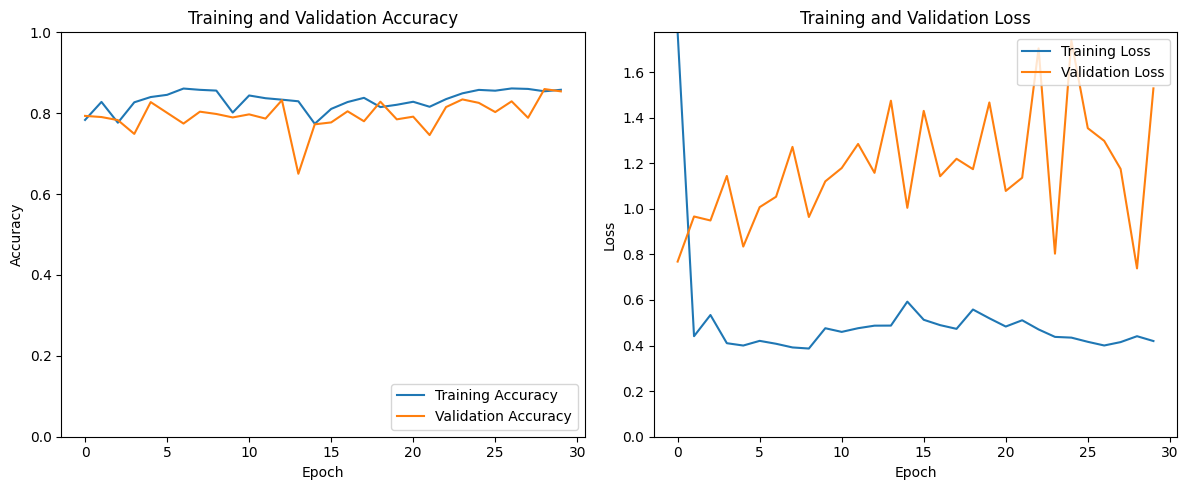

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
model.save('Resnet50.h5')

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Histogram
1 : bar chart
2 : line chart
3 : pie chart


In [ ]:
predictions = model.predict(validation_generator)

30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 381ms/step


In [ ]:
predictions[1]

array([4.5920032e-04, 1.0517190e-07, 9.8147148e-01, 1.8069236e-02],
      dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
decoded_test_predictions = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes
test_accuracy = accuracy_score(true_labels, decoded_test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 30.33%


In [ ]:
np.argmax(predictions[100])

2

In [ ]:
word_dict = {0:'Histogram',1:'Bar Char', 2:'Line Chart', 3:'Pie Chart'}

In [ ]:
len(word_dict)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dataset_dir = '/content/cluster_dataset/test'

# Create an ImageDataGenerator for test data (you might not need data augmentation for testing)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test data generator
test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(200, 200),
    shuffle=False,
    batch_size=270,
    class_mode=None)  # Set class_mode to None as it's for prediction))

Found 1055 images belonging to 4 classes.


In [ ]:
# Now you can use your trained model to make predictions on the test data
predictions_test = model.predict(test_generator)
# Assuming 'word_dict' is a dictionary mapping class indices to their respective labels
# word_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6'}
# Decode the predictions and print the results
decoded_test_predictions = np.argmax(predictions_test, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 58s 9s/step


In [ ]:
decoded_test_predictions = np.argmax(predictions_test, axis=1)
true_labels = test_generator.classes
test_accuracy = accuracy_score(true_labels, decoded_test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 85.40%


In [ ]:
test_images = next(test_generator)

In [ ]:
predictions_test = model.predict(test_images)

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 645ms/step


In [ ]:
len(predictions_test)

270

In [ ]:
np.argmax(predictions_test[1])

0

In [ ]:
decadd_newdoc_ufuncoded_test_predictions = np.argmax(predictions_test, axis=1)

In [ ]:
true__labels = test_generator.classes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

Found 1055 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step
1055 1055


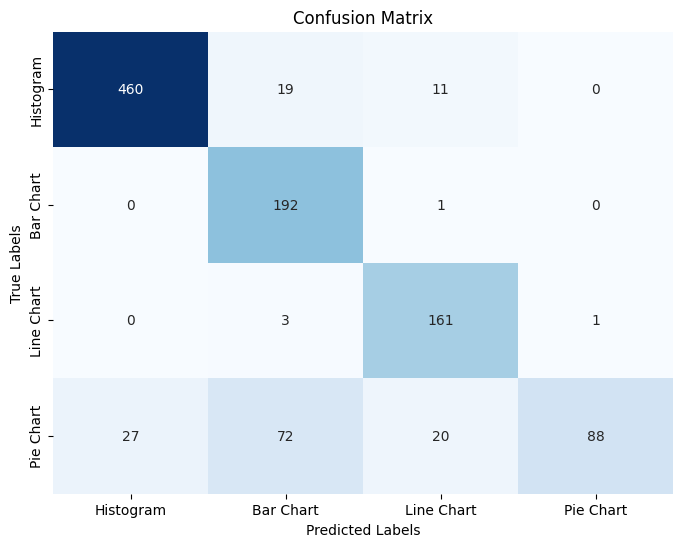

In [ ]:
# Assuming 'test_generator' is your test data generator
# Make sure 'shuffle' is set to False to maintain order
test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(200, 200),
    shuffle=False,  # Set shuffle to False for test data
    batch_size=36,  # Set batch_size based on your generator configuration
    class_mode='categorical'  # Use binary class_mode for binary classification
)

# Get true labels from the generator (already binary)
true_labels_binary = test_generator.classes

# Make predictions on the test data
predictions_test = model.predict(test_generator)

# Decode predictions
decoded_test_predictions = np.argmax(predictions_test, axis=1)

# Now, the lengths should match
print(len(true_labels_binary), len(decoded_test_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels_binary, decoded_test_predictions)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Histogram', 'Bar Chart', 'Line Chart', 'Pie Chart'], yticklabels=['Histogram', 'Bar Chart', 'Line Chart', 'Pie Chart'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Densnet

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pre-trained DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Print model summary
# model.summary()

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


210/210 ━━━━━━━━━━━━━━━━━━━━ 196s 791ms/step - accuracy: 0.9423 - loss: 0.1768 - val_accuracy: 0.8152 - val_loss: 0.8088
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 142s 653ms/step - accuracy: 0.9947 - loss: 0.0209 - val_accuracy: 0.8019 - val_loss: 0.9451
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 139s 641ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accuracy: 0.8133 - val_loss: 0.9474
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 147s 681ms/step - accuracy: 0.9960 - loss: 0.0119 - val_accuracy: 0.8360 - val_loss: 0.7319
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 146s 676ms/step - accuracy: 0.9956 - loss: 0.0148 - val_accuracy: 0.8322 - val_loss: 0.8375
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 142s 655ms/step - accuracy: 0.9949 - loss: 0.0169 - val_accuracy: 0.8351 - val_loss: 0.9756
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 149s 688ms/step - accuracy: 0.9955 - loss: 0.0125 - val_accuracy: 0.8275 - val_loss: 0.8025
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 143s 657ms/step - accuracy: 0.9958 - loss: 0.01

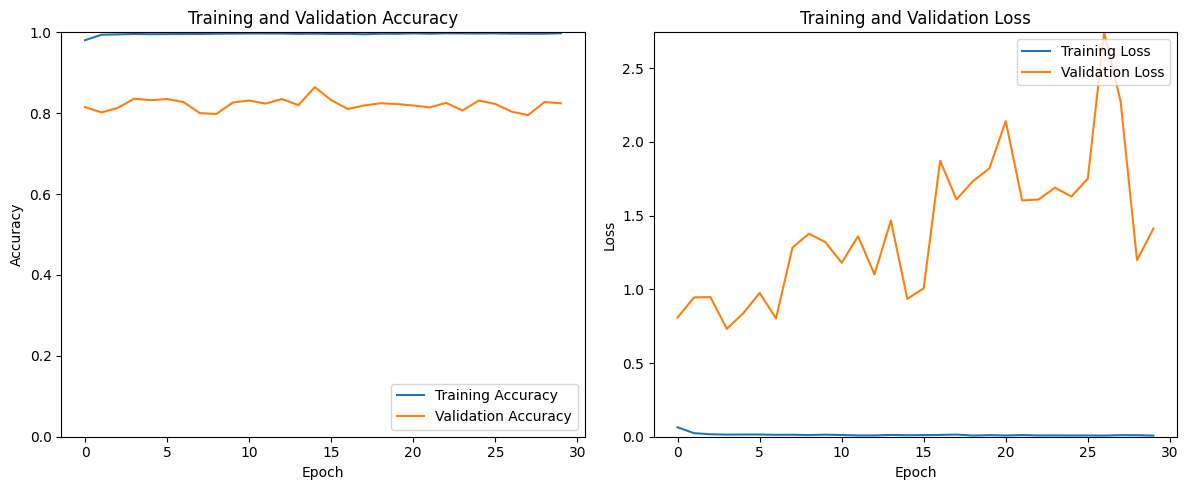

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
word_dict = {0:'Histogram',1:'Bar Char', 2:'Line Chart', 3:'Pie Chart'}

In [ ]:
len(word_dict)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dataset_dir = '/content/cluster_dataset/test'

# Create an ImageDataGenerator for test data (you might not need data augmentation for testing)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test data generator
test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(200, 200),
    shuffle=False,
    batch_size=270,
    class_mode=None)  # Set class_mode to None as it's for prediction))

NameError: name 'word_dict' is not defined

In [ ]:
# Now you can use your trained model to make predictions on the test data
predictions_test = model.predict(test_generator)
# Assuming 'word_dict' is a dictionary mapping class indices to their respective labels
# word_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6'}
# Decode the predictions and print the results
decoded_test_predictions = np.argmax(predictions_test, axis=1)

NameError: name 'model' is not defined

In [ ]:
decoded_test_predictions = np.argmax(predictions_test, axis=1)
true_labels = test_generator.classes
test_accuracy = accuracy_score(true_labels, decoded_test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
# Assuming 'test_generator' is your test data generator
# Make sure 'shuffle' is set to False to maintain order
test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(200, 200),
    shuffle=False,  # Set shuffle to False for test data
    batch_size=36,  # Set batch_size based on your generator configuration
    class_mode='categorical'  # Use binary class_mode for binary classification
)

# Get true labels from the generator (already binary)
true_labels_binary = test_generator.classes

# Make predictions on the test data
predictions_test = model.predict(test_generator)

# Decode predictions
decoded_test_predictions = np.argmax(predictions_test, axis=1)

# Now, the lengths should match
print(len(true_labels_binary), len(decoded_test_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels_binary, decoded_test_predictions)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Histogram', 'Bar Chart', 'Line Chart', 'Pie Chart'], yticklabels=['Histogram', 'Bar Chart', 'Line Chart', 'Pie Chart'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()